# Credit Card Routing for Online Purchases via Predictive Modelling:

Credit Card Routing for Online Purchase via Predictive Modelling" means using machine learning models to predict the most suitable Payment Service Provider (PSP) for a given online credit card transaction based on various input features such as transaction amount, country, PSP, card type, and 3D security. The idea is to improve the efficiency and accuracy of credit card routing, which involves directing a transaction to the most appropriate PSP to minimize transaction failure and maximize profit for the payment processing company

## Import Libaries

In [34]:
from datetime import datetime         # Import the datetime module from Python standard library
from IPython.display import display   # Import the display function from IPython.display module
from datetime import timedelta        # Import the timedelta function from datetime module
import seaborn as sns                 # Import the Seaborn library for data visualization
import numpy as np                    # Import the NumPy library for numerical computing
import pandas as pd                   # Import the Pandas library for data analysis
import matplotlib.pyplot as plt       # Import the pyplot module from Matplotlib library for plotting
import psutil                         # Import the psutil library for system monitoring

In [68]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")

# Your code here

# Reset warnings filter
warnings.filterwarnings("default")


## Read the raw data

In [35]:
df = pd.read_excel(r"/content/PSP_Jan_Feb_2019.xlsx")

In [36]:
df.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [37]:
# check the shape of the dataframe
df.shape

(50410, 8)

In [38]:
# get the info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [39]:
# check if there are any null values
df.isna().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [40]:
# Verifying that the data types of the columns align with our expectations.
df.dtypes

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object

In [41]:
df.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [42]:
# Eye balling the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50410.0,25204.500000,14552.257872,0.0,12602.25,25204.5,37806.75,50409.0
amount,50410.0,202.395715,96.274730,6.0,133.00,201.0,269.00,630.0
success,50410.0,0.202896,0.402160,0.0,0.00,0.0,0.00,1.0
3D_secured,50410.0,0.238266,0.426027,0.0,0.00,0.0,0.00,1.0


In [43]:
#finding unique data
df.apply(lambda x: len(x.unique()))

Unnamed: 0    50410
tmsp          50121
country           3
amount          517
success           2
PSP               4
3D_secured        2
card              3
dtype: int64

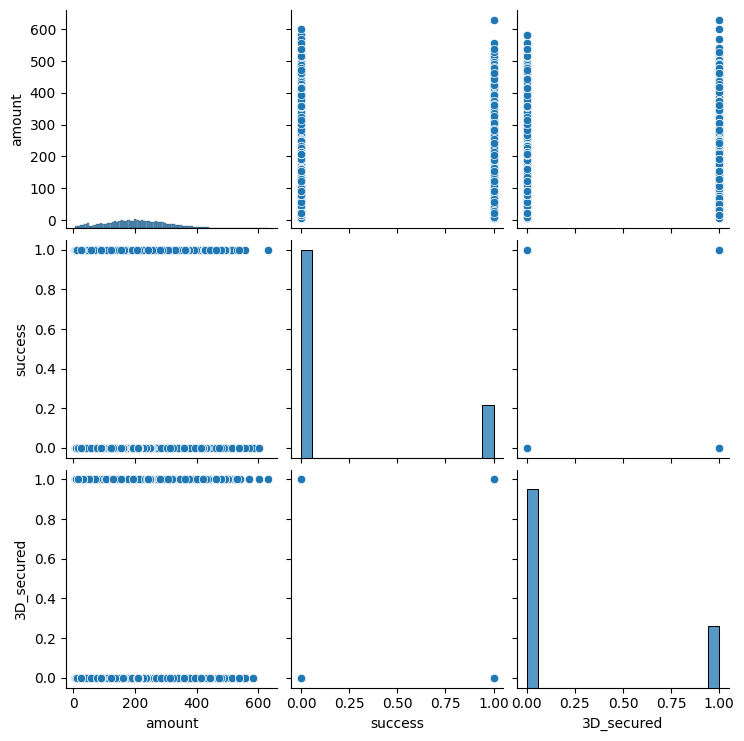

In [44]:
sns.pairplot(df.iloc[:,1:])

In [45]:
# Verifying whether any logical errors exist, such as illogical values in particular columns.
df[df['3D_secured']>=2].sum()

<ipython-input-45-0be87da11e7a>:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['3D_secured']>=2].sum()


Unnamed: 0    0.0
country       0.0
amount        0.0
success       0.0
PSP           0.0
3D_secured    0.0
card          0.0
dtype: float64

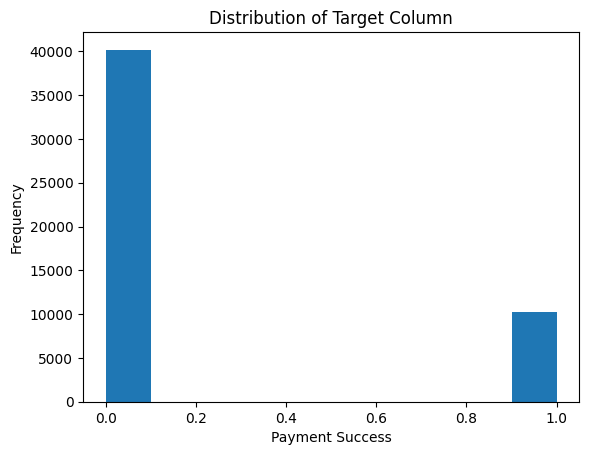

In [46]:
# Plot the target column as a histogram
plt.hist(df['success'])
# Add labels and title to the plot
plt.xlabel('Payment Success')
plt.ylabel('Frequency')
plt.title('Distribution of Target Column')

# Show the plot
plt.show()

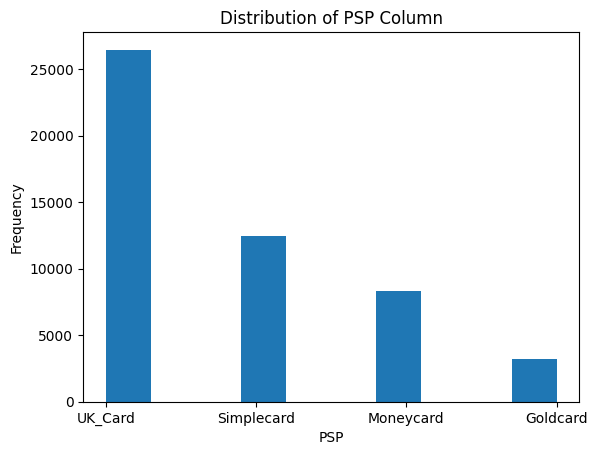

In [47]:
# Plot the target column as a histogram
plt.hist(df['PSP'])
# Add labels and title to the plot
plt.xlabel('PSP')
plt.ylabel('Frequency')
plt.title('Distribution of PSP Column')

# Show the plot
plt.show()

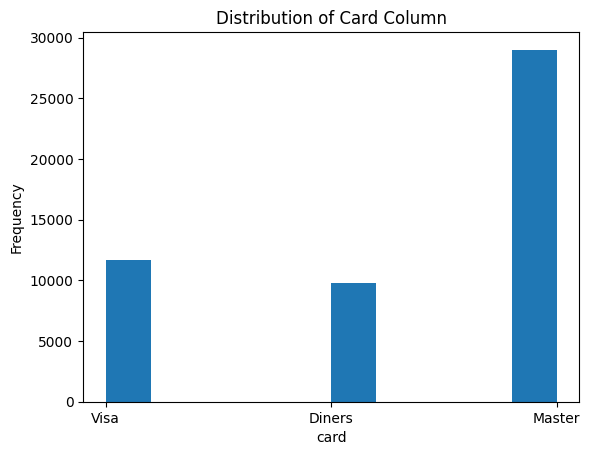

In [48]:
# Plot the target column as a histogram
plt.hist(df['card'])
# Add labels and title to the plot
plt.xlabel('card')
plt.ylabel('Frequency')
plt.title('Distribution of Card Column')

# Show the plot
plt.show()

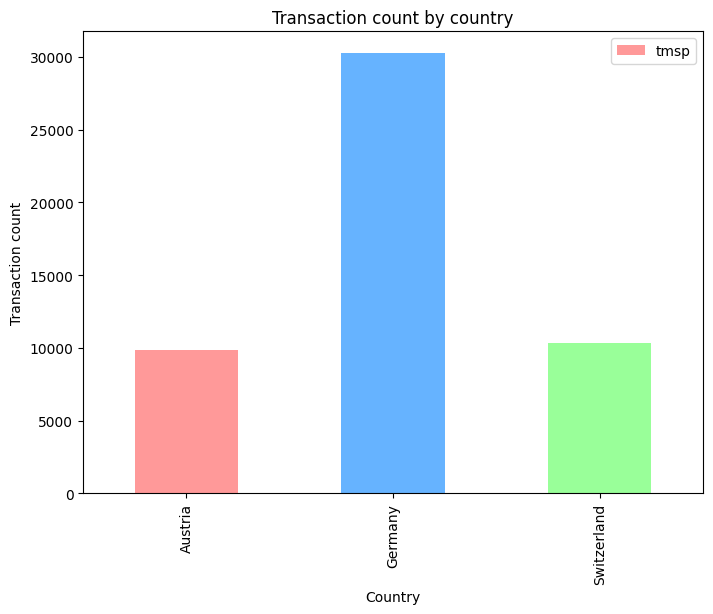

In [49]:

piv = pd.pivot_table(df, values='tmsp', index=['country'], aggfunc='count')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#b3b3b3']
plot = piv.plot(kind='bar', y='tmsp', color=colors, figsize=(8, 6))
plot.set_xlabel("Country")
plot.set_ylabel("Transaction count")
plot.set_title("Transaction count by country")
plt.show()

In [50]:
df.shape

(50410, 8)

In [51]:
# Adding a new column to hold the attempt number
df['attempt_number'] = 0

# Calculating the attempt number for each try
for index, row in df.iterrows():
    if index > 0:
        if ((row['tmsp'] >= (df.iat[index-1,1]- timedelta(minutes=1)))&(row['country'] == df.iat[index-1,2])&(row['amount'] == df.iat[index-1,3])):
            df.iat[index,8] = df.iat[index-1,8]+1
            df.at[index, 'attempt_number'] = df.at[index-1, 'attempt_number']+1


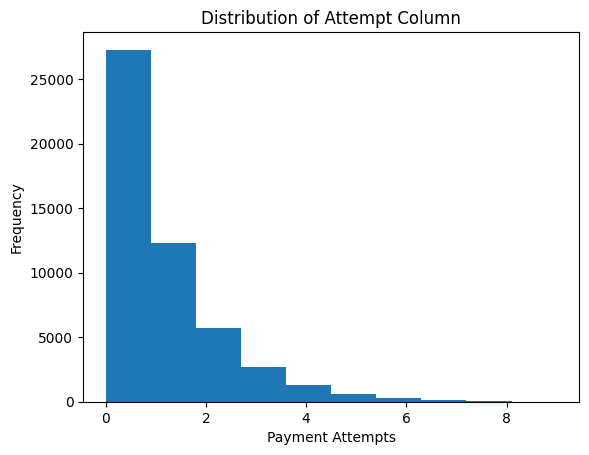

In [52]:
# Plot the Attempt column as a histogram
plt.hist(df['attempt_number'])

# Add labels and title to the plot
plt.xlabel('Payment Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Attempt Column')

# Show the plot
plt.show()

In [53]:
# removing the unnamed column - which is not necessary
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)
df.shape

(50410, 8)

In [54]:
# converting timestamp to the hours and minutes
df['hour'] = df.tmsp.apply(lambda x: x.hour)
df['minute'] = df.tmsp.apply(lambda x: x.minute)

In [55]:
# drop the timestamp
df = df.drop(columns=['tmsp'])

In [56]:
# Once this is added, the raw data will appear as follows:
df.head()

,country,amount,success,PSP,3D_secured,card,attempt_number,hour,minute
0,Germany,89,0,UK_Card,0,Visa,0,0,1
1,Germany,89,1,UK_Card,0,Visa,1,0,1
2,Germany,238,0,UK_Card,1,Diners,0,0,2
3,Germany,238,1,UK_Card,1,Diners,1,0,3
4,Austria,124,0,Simplecard,0,Diners,0,0,4


In [57]:
# copy the dataframe - so that we don't alter main dataframe
temp_df = df.copy()
temp_df.head()

,country,amount,success,PSP,3D_secured,card,attempt_number,hour,minute
0,Germany,89,0,UK_Card,0,Visa,0,0,1
1,Germany,89,1,UK_Card,0,Visa,1,0,1
2,Germany,238,0,UK_Card,1,Diners,0,0,2
3,Germany,238,1,UK_Card,1,Diners,1,0,3
4,Austria,124,0,Simplecard,0,Diners,0,0,4


In [58]:
temp_df = pd.get_dummies(temp_df, columns=["country", "card"])
temp_df.head()

,amount,success,PSP,3D_secured,attempt_number,hour,minute,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa
0,89,0,UK_Card,0,0,0,1,0,1,0,0,0,1
1,89,1,UK_Card,0,1,0,1,0,1,0,0,0,1
2,238,0,UK_Card,1,0,0,2,0,1,0,1,0,0
3,238,1,UK_Card,1,1,0,3,0,1,0,1,0,0
4,124,0,Simplecard,0,0,0,4,1,0,0,1,0,0


In [26]:
temp_df.dtypes

amount                  int64
success                 int64
PSP                    object
3D_secured              int64
attempt_number          int64
hour                    int64
minute                  int64
country_Austria         uint8
country_Germany         uint8
country_Switzerland     uint8
card_Diners             uint8
card_Master             uint8
card_Visa               uint8
dtype: object

In [59]:
X = temp_df.drop(['PSP'], axis=1)
y = temp_df['PSP']

In [28]:
# # Import necessary libraries
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Split into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply standard scaling to the training and testing sets
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train and evaluate Logistic Regression model
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred_lr = lr.predict(X_test)
# print("Logistic Regression")
# print(confusion_matrix(y_test, y_pred_lr))
# print(classification_report(y_test, y_pred_lr))

# # Train and evaluate Decision Tree model
# dt = DecisionTreeClassifier()
# dt.fit(X_train, y_train)
# y_pred_dt = dt.predict(X_test)
# print("Decision Tree")
# print(confusion_matrix(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt))

# # Train and evaluate Random Forest model
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print("Random Forest")
# print(confusion_matrix(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization
model = LogisticRegression(solver='liblinear')

# Define hyperparameters for grid search
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
cm_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the best model on the testing set
y_test_pred = best_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix for training set
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)

# Print evaluation metrics and confusion matrix for testing set
print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)


Training set:
Accuracy: 0.525664550684388
Precision: 0.27632321984621955
Recall: 0.525664550684388
F1 Score: 0.3622332572678122
Confusion Matrix:
[[    0     0     0  2586]
 [    0     0     0  6580]
 [    0     0     0  9963]
 [    0     0     0 21199]]
Testing set:
Accuracy: 0.5217218805792502
Precision: 0.27219372067514935
Recall: 0.5217218805792502
F1 Score: 0.3577443738556714
Confusion Matrix:
[[   0    0    0  622]
 [   0    0    0 1717]
 [   0    0    0 2483]
 [   0    0    0 5260]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization
model = GaussianNB()

# Define hyperparameters for grid search
param_grid = {}  # No hyperparameters for Gaussian Naive Bayes

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training set
y_train_pred = best_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')
cm_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the best model on the testing set
y_test_pred = best_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix for training set
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)

# Print evaluation metrics and confusion matrix for testing set
print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._s

Training set:
Accuracy: 0.525664550684388
Precision: 0.27632321984621955
Recall: 0.525664550684388
F1 Score: 0.3622332572678122
Confusion Matrix:
[[    0     0     0  2586]
 [    0     0     0  6580]
 [    0     0     0  9963]
 [    0     0     0 21199]]
Testing set:
Accuracy: 0.5217218805792502
Precision: 0.27219372067514935
Recall: 0.5217218805792502
F1 Score: 0.3577443738556714
Confusion Matrix:
[[   0    0    0  622]
 [   0    0    0 1717]
 [   0    0    0 2483]
 [   0    0    0 5260]]


In [71]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Training set:
Accuracy: 0.5768200753818686
Precision: 0.6666196693336597
Recall: 0.5768200753818686
F1 Score: 0.4746642895957468
Confusion Matrix:
[[  273    30   122  2161]
 [   19   596   205  5760]
 [   16    50  1437  8460]
 [   22    38   183 20956]]

Testing set:
Accuracy: 0.5099186669311645
Precision: 0.38565110741300235
Recall: 0.5099186669311645
F1 Score: 0.37808432731742514
Confusion Matrix:
[[  10   11   49  552]
 [  11   24   68 1614]
 [  12   30  108 2333]
 [  17   52  192 4999]]


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)


Training set:
Accuracy: 0.9993056933148184
Precision: 0.9993065141318708
Recall: 0.9993056933148184
F1 Score: 0.999305838587312
Confusion Matrix:
[[ 2586     0     0     0]
 [    2  6578     0     0]
 [    2     7  9954     0]
 [    2     5    10 21182]]

Testing set:
Accuracy: 0.3684784764927594
Precision: 0.37507765729926235
Recall: 0.36847847649275944
F1 Score: 0.3716515542619545
Confusion Matrix:
[[  65  115  144  298]
 [ 135  328  434  820]
 [ 176  434  614 1259]
 [ 349  837 1366 2708]]


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)


Training set:
Accuracy: 0.9992808966474905
Precision: 0.9992809416804267
Recall: 0.9992808966474905
F1 Score: 0.9992808961108978
Confusion Matrix:
[[ 2583     1     1     1]
 [    1  6571     4     4]
 [    1     3  9955     4]
 [    2     1     6 21190]]

Testing set:
Accuracy: 0.4551676254711367
Precision: 0.38734998484897176
Recall: 0.4551676254711367
F1 Score: 0.40515942468589483
Confusion Matrix:
[[  25   60  100  437]
 [  42  167  315 1193]
 [  46  201  448 1788]
 [  80  363  868 3949]]


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Predict the target variable for the training and testing sets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Compute confusion matrix for the training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_score_train)
print("Confusion Matrix:")
print(cm_train)
print("")

print("Testing set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_score_test)
print("Confusion Matrix:")
print(cm_test)


Training set:
Accuracy: 0.5288881174370165
Precision: 0.5517222148642896
Recall: 0.5288881174370165
F1 Score: 0.37274313063836456
Confusion Matrix:
[[   14     7    39  2526]
 [    3    41    57  6479]
 [    1     8   139  9815]
 [    0     7    57 21135]]

Testing set:
Accuracy: 0.5212259472326919
Precision: 0.38990944537207756
Recall: 0.5212259472326919
F1 Score: 0.36198620456379177
Confusion Matrix:
[[   0    1   17  604]
 [   2    4   13 1698]
 [   0    3   17 2463]
 [   3    5   18 5234]]
